# Techniques for Calculating the Efficient Frontier

In [1]:
import sys
import os

import sys
sys.path.insert(0, os.path.abspath('../src/mpt/efficient_frontier'))
sys.path.insert(0, os.path.abspath('../src/mpt/utils'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from EfficientFrontier import EfficientFrontier

## Short Sales Allowed with Riskless Lending and Borrowing

There is a single portfolio in return volatility space that is prefered to all other portfolios. The portfolio plots on the ray connecting the riskless asset and a risky portfolio.

It is the tangency potfolio that maximises the excess return to the volitility of the portfolio.

**Maximise**

$$ \frac{x^T\mu x - R_f}{x^T\Sigma x} $$

**Subject to**

$$ \sum_{i=1}^N X_i = 1$$

In [3]:
μ = np.array([14., 8., 20.])

Σ = np.array([
    [6*6.,     0.5*6*3., 0.2*6*15.],
    [0.5*6*3., 3*3.,      0.4*3*15.],
    [0.2*6*15., 0.4*3*15., 15*15.]
])

R_f = 5

In [4]:
efficient_frontier = EfficientFrontier.from_sample_statistics(μ, Σ)

In [5]:
?efficient_frontier._tangency_portfolio_weights

Signature: efficient_frontier._tangency_portfolio_weights(riskless_rate)
Docstring:
Tangency portfolio weight calculation.

Calculates the weights of the tangency portfolio given a risk free rate available
to an investor.

This is done by absorbing the constraint of an investor being fully invested into the objective
function being solved:

    θ = x^Tμ - R_f / x^tΣx

And then solving the resulting system of linear equations before normalizing the weights.

:param riskless_rate:
:return: tangency portfolio weights
File:      ~/UCL/Disertation/porfolio-optimisation/src/mpt/efficient_frontier/EfficientFrontier.py
Type:      method


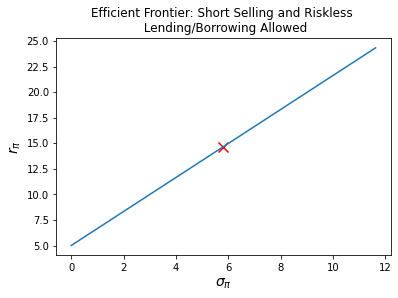

In [7]:
efficient_frontier.plot_frontier(allow_shorts=True, allow_lending=True, riskless_rate=R_f)

## Short Sales Allowed: No Riskless Lending and Borrowing

Whenever an investor can't lend/borrow at the riskless rate the following section must be modified. However, much of the analysis carries over. The efficient set constructed before allowed us to calculate the tandency potfolio which lies on the efficent set at the point where lending/borrowing is zero. Therfore we can assume different risk free rates and find variouse tangeny portolios. 

If we were to proceed with this approach we would have to calculate n portfolio weights, one for each point we wish to plot on the efficient frontier. If we have lots of securities, N then the $\mathcal{O}(N^3)$  computational complexity of solving the system of linear equations for each point will become an issue.

We infact only need two portfolios summary statistics along with the covariance between them in order to trace out the entire efficient set. We can find the covariance between the two portfolios by simply solving for $\sigma_{ab}$ in the standard definition of the variance of two risky assets.

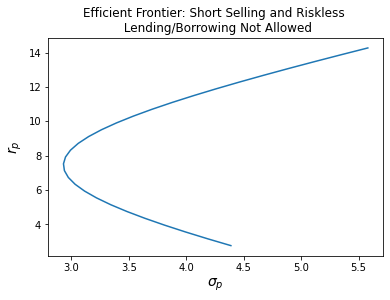

In [8]:
efficient_frontier.plot_frontier(allow_shorts=True, allow_lending=False)

# Riskless Lending and Borrowing with Short Sales Not Allowed

As with the fully unconstrained case there exists a single portfolio that is optimal. Again it is the portfolio that maximises the excess returns over the portfolio volitility. 

The difference now is that we must include the additional constraint that all security weights must be grate than or equal to zero. Formally we can state the problem as 


**Maximise**

$$ \frac{x^T\mu x - R_f}{x^T\Sigma x} $$

**Subject to**

$$ \sum_{i=1}^{N} x_i = 1 $$

$$x_i \geq 0$$

## Simplifying the objective

TODO WRITE UP DERIVATION

**Minimize**

$$ y^T \Sigma y $$

**Subject to**

$$ (\mu - R_F)^T y = 1 $$

$$\hat{A} y \geq 0$$

$$ 0 \leq y$$

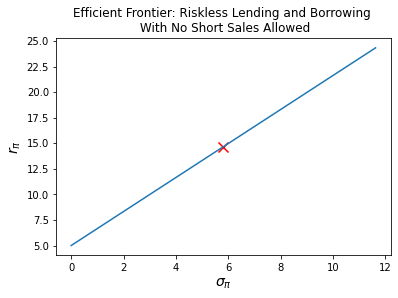

In [6]:
efficient_frontier.plot_frontier(allow_shorts=False, allow_lending=True, riskless_rate=5)

## No Short Selling and No Riskless Lending and Borrowing

The efficient set is found by minimising the risk level for a given level of expected return. Therfore, one can specify the return at some level and minimize the risk, obtaining a single point on the efficient frontier. We can fromalize this by say we seek to 

**Minimize**

$$ x^T\Sigma x $$

**Subject to**

$$ \sum_{i=1}^N X_i = 1$$

$$ \sum_{i=1}^N X_i \mu = \bar{R}_{\pi}$$

$$ X_i \geq 0$$

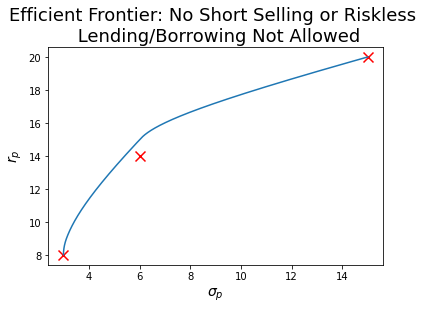

In [7]:
efficient_frontier.plot_frontier(allow_shorts=False, allow_lending=False, riskless_rate=5)